In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import pandas as pd


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle

In [61]:
DATADIR = "C:/Users/USER/Desktop/Cow/2"
CATEGORIES = ["Dung","No Dung"]
IMG_SIZE = 200

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████| 50/50 [00:02<00:00, 21.06it/s]

116


In [62]:
import random
random.shuffle(training_data)

In [99]:
for sample in training_data[:8]:
    print(sample[1])

1
0
1
1
1
1
0
0


In [64]:
import csv
with open('GFG.txt', 'w') as f:
    write = csv.writer(f)
    write.writerows(training_data)

In [65]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [66]:
t=pd.DataFrame(y)

In [67]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [68]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y=np.array(y)
X=np.array(X)

X = X/255.0

In [94]:
num_classes = 2

model = tf.keras.Sequential([
# tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200,200)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [95]:
history=model.fit(X, y, batch_size=20, epochs=8,validation_split=0.30)

Epoch 1/8
5/5 [==============================] - 3s 662ms/step - loss: 1.0418 - accuracy: 0.4938 - val_loss: 0.9305 - val_accuracy: 0.4000
Epoch 2/8
5/5 [==============================] - 2s 462ms/step - loss: 0.7773 - accuracy: 0.4568 - val_loss: 0.6712 - val_accuracy: 0.6000
Epoch 3/8
5/5 [==============================] - 2s 476ms/step - loss: 0.7229 - accuracy: 0.5556 - val_loss: 0.5682 - val_accuracy: 0.6000
Epoch 4/8
5/5 [==============================] - 2s 484ms/step - loss: 0.5921 - accuracy: 0.5556 - val_loss: 0.4874 - val_accuracy: 0.6000
Epoch 5/8
5/5 [==============================] - 2s 471ms/step - loss: 0.4763 - accuracy: 0.7037 - val_loss: 0.4398 - val_accuracy: 0.8286
Epoch 6/8
5/5 [==============================] - 2s 460ms/step - loss: 0.4245 - accuracy: 0.8025 - val_loss: 0.4893 - val_accuracy: 0.8000
Epoch 7/8
5/5 [==============================] - 2s 454ms/step - loss: 0.5191 - accuracy: 0.8519 - val_loss: 0.4597 - val_accuracy: 0.8857
Epoch 8/8
5/5 [============

In [97]:
def prepare(filepath):
    IMG_SIZE = 200  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

predictions = model.predict([prepare('10.jpg')])
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(CATEGORIES[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Dung with a 100.00 percent confidence.


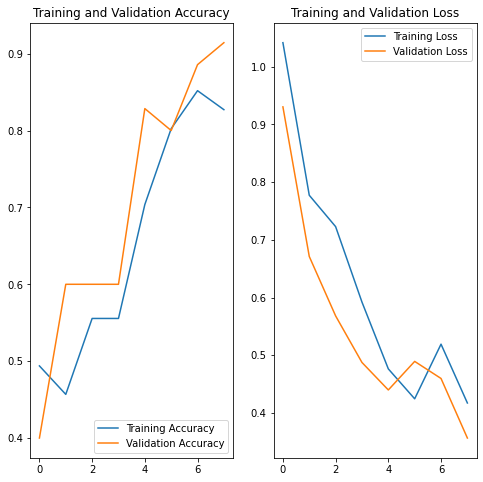

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()